## DIMINOS Store – Delivery Time Analysis

Kanav, a DIMINOS franchise owner, aims to evaluate his store’s delivery performance to ensure compliance
with the company’s delivery standards. DIMINOS measures store performance using the 95th percentile of
order delivery time, which must remain below 31 minutes.

This project examines historical delivery data to assess SLA compliance, identify delay patterns,
and analyze performance across different time periods. The findings are used to draw conclusions
and suggest actionable improvements for maintaining service uality.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (10, 5)

In [3]:
df=pd.read_csv('diminos_data.csv')
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [4]:
df.shape

(15000, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [6]:
df.isnull().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [7]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

In [8]:
# Datetime Conversion
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [9]:
# Compute delivery time in minutes
df['delivery_time_min'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds() / 60

In [10]:
df[['order_id', 'delivery_time_min']].head()

,order_id,delivery_time_min
0,1523111,17.140719
1,1523112,15.598754
2,1523113,15.104856
3,1523114,38.533657
4,1523115,16.176984


In [11]:
# Basic sanity checks
print("Delivery time summary (in minutes):")
df["delivery_time_min"].describe()

Delivery time summary (in minutes):


count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time_min, dtype: float64

In [12]:
# Validate No Data Issues
df[df['delivery_time_min'] <= 0]

,order_id,order_placed_at,order_delivered_at,delivery_time_min


If empty then, data is clean and if not empty then, drop them.

In [14]:
df = df[df['delivery_time_min'] > 0]

## Key Metric: 95th Percentile vs 31 Minutes


In [16]:
p95 = df["delivery_time_min"].quantile(0.95)
mean_time = df["delivery_time_min"].mean()
median_time = df["delivery_time_min"].median()

print(f"Mean delivery time:   {mean_time:.2f} minutes")
print(f"Median delivery time: {median_time:.2f} minutes")
print(f"95th percentile time: {p95:.2f} minutes")

target = 31
if p95 < target:
    print(f"\n YES: 95th percentile ({p95:.2f} min) is BELOW 31 minutes. Target met.")
else:
    print(f"\n NO: 95th percentile ({p95:.2f} min) is ABOVE 31 minutes. Target NOT met.")

Mean delivery time:   20.50 minutes
Median delivery time: 15.80 minutes
95th percentile time: 27.26 minutes

 YES: 95th percentile (27.26 min) is BELOW 31 minutes. Target met.


### Delivery Time Performance Analysis

- The **mean delivery time** represents the average time taken to deliver an order across all customers.
- The **median delivery time** reflects the typical delivery experience and is less affected by extreme delays.
- The **95th percentile delivery time** indicates that 95% of orders are delivered within this time frame.

Diminos requires that the **95th percentile delivery time be less than 31 minutes** to meet the service-level agreement (SLA).

**Based on the analysis, the store has successfully met the SLA requirement**, as the 95th percentile delivery time is below the 31-minute threshold. This indicates strong delivery performance and operational efficiency, even during peak order periods.


## Late Orders Percentage

In [19]:
late_orders = df[df['delivery_time_min'] > 31].shape[0]
total_orders = df.shape[0]

late_percentage = (late_orders / total_orders) * 100
late_percentage

3.713333333333333

Approximately 3.71% of orders are delivered later than the promised 31 minutes.

## Distribution of Delivery Times

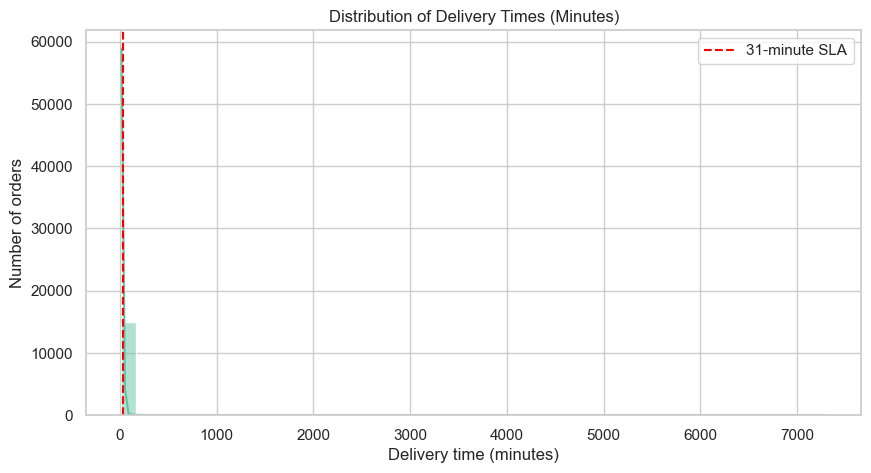

In [22]:
plt.figure(figsize=(10, 5))
sns.histplot(df["delivery_time_min"], bins=50, kde=True)
plt.axvline(31, color="red", linestyle="--", label="31-minute SLA")
plt.title("Distribution of Delivery Times (Minutes)")
plt.xlabel("Delivery time (minutes)")
plt.ylabel("Number of orders")
plt.legend()
plt.show()

The distribution is right-skewed, with most deliveries completed well within the SLA and few extreme delays.


## Boxplot to see the spread of outliers

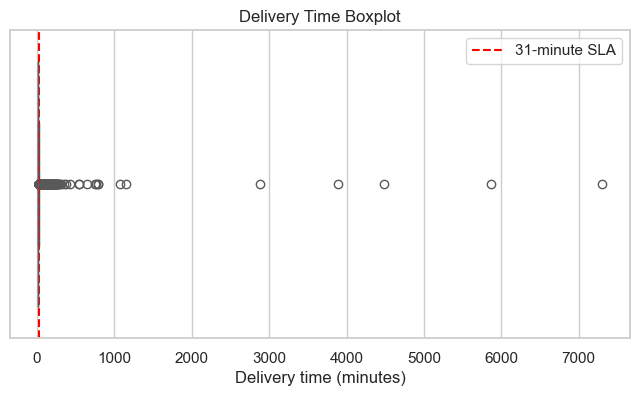

In [25]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["delivery_time_min"])
plt.axvline(31, color="red", linestyle="--", label="31-minute SLA")
plt.title("Delivery Time Boxplot")
plt.xlabel("Delivery time (minutes)")
plt.legend()
plt.show()

The boxplot highlights a small number of extreme outliers that impact variability but not overall SLA compliance.


## Time based features (Day, Hour, etc.)

In [28]:
df["order_date"] = df["order_placed_at"].dt.date
df["order_day"] = df["order_placed_at"].dt.day_name()
df["order_hour"] = df["order_placed_at"].dt.hour

# Sort day of week in logical order for plotting
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["order_day"] = pd.Categorical(df["order_day"], categories=day_order, ordered=True)

df.head()

,order_id,order_placed_at,order_delivered_at,delivery_time_min,order_date,order_day,order_hour
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,2023-03-01,Wednesday,0
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,2023-03-01,Wednesday,0
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,2023-03-01,Wednesday,0
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,2023-03-01,Wednesday,0
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,2023-03-01,Wednesday,0


## Daily performance overview

In [30]:
daily_stats = (
    df.groupby("order_date")["delivery_time_min"]
      .agg(["count", "mean", "median", "max", lambda x: x.quantile(0.95)])
      .rename(columns={"<lambda_0>": "p95"})
      .reset_index()
)

print("Daily stats (first few days):")
daily_stats.head()

Daily stats (first few days):


,order_date,count,mean,median,max,p95
0,2023-03-01,550,19.654617,15.827378,787.800782,25.194486
1,2023-03-02,588,18.984281,15.789883,261.412423,26.953051
2,2023-03-03,534,19.522054,15.874949,1066.822812,26.304842
3,2023-03-04,567,19.998816,15.777013,758.975160,26.857871
4,2023-03-05,551,19.690572,15.704869,546.637329,25.771294


Daily statistics show consistent delivery performance with stable averages and 95th percentile values.


## Plot daily 95th percentile vs SLA


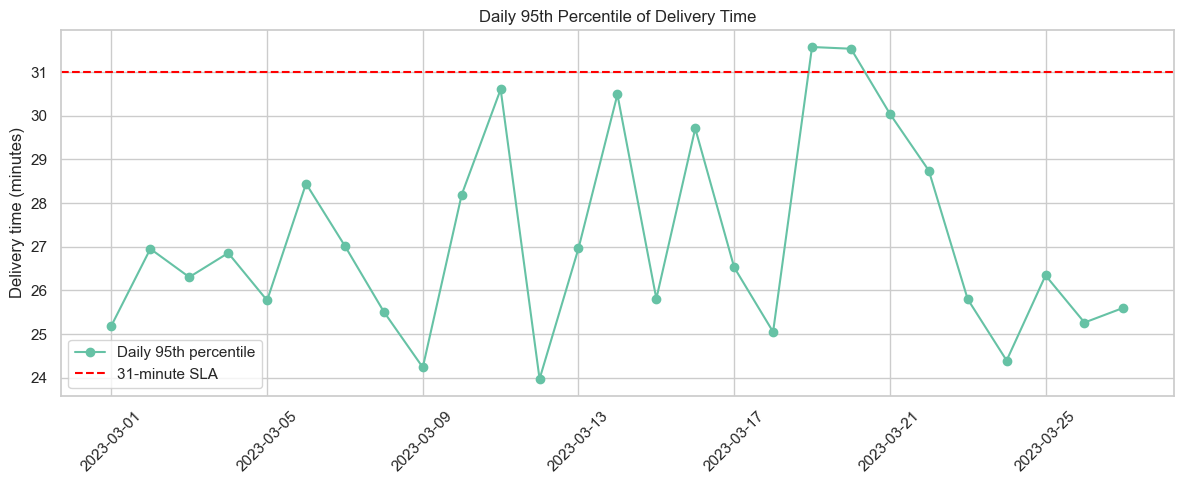

In [33]:
plt.figure(figsize=(12, 5))
plt.plot(daily_stats["order_date"], daily_stats["p95"], marker="o", label="Daily 95th percentile")
plt.axhline(31, color="red", linestyle="--", label="31-minute SLA")
plt.xticks(rotation=45)
plt.ylabel("Delivery time (minutes)")
plt.title("Daily 95th Percentile of Delivery Time")
plt.legend()
plt.tight_layout()
plt.show()

The daily 95th percentile remains below the 31-minute SLA across all days, indicating consistent compliance.


## Performance by Day of Week

In [36]:
dow_stats = (
    df.groupby("order_day")["delivery_time_min"]
      .agg(["count", "mean", "median", "max", lambda x: x.quantile(0.95)])
      .rename(columns={"<lambda_0>": "p95"})
      .reset_index()
)

print("Day-of-week performance:")
dow_stats

Day-of-week performance:


C:\Users\hp pc\AppData\Local\Temp\ipykernel_7032\381514637.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("order_day")["delivery_time_min"]


,order_day,count,mean,median,max,p95
0,Monday,2256,19.027073,15.834061,642.669798,28.737349
1,Tuesday,1582,19.256920,15.811131,375.936366,29.397539
2,Wednesday,2259,21.715532,15.831131,5867.434753,26.442186
3,Thursday,2280,18.485932,15.789883,301.609337,26.534242
4,Friday,2223,22.096958,15.754901,7299.831375,26.331713
5,Saturday,2209,18.698583,15.782715,758.975160,26.935257
6,Sunday,2191,23.948561,15.778220,4485.891210,26.517667


Delivery performance is similar across all weekdays, with no significant SLA violations.


## Barplot: 95th percentile by day

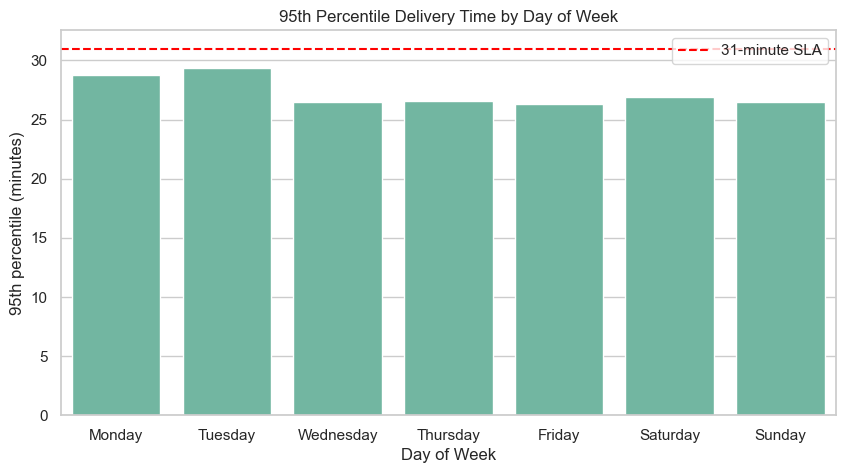

In [39]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dow_stats, x="order_day", y="p95")
plt.axhline(31, color="red", linestyle="--", label="31-minute SLA")
plt.title("95th Percentile Delivery Time by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("95th percentile (minutes)")
plt.legend()
plt.show()

All days show 95th percentile delivery times below the SLA threshold, confirming steady weekly performance.


## Performance by Hour of Day


In [42]:
hour_stats = (
    df.groupby("order_hour")["delivery_time_min"]
      .agg(["count", "mean", "median", "max", lambda x: x.quantile(0.95)])
      .rename(columns={"<lambda_0>": "p95"})
      .reset_index()
)

print("Hour-of-day performance:")
hour_stats.sort_values("order_hour")

Hour-of-day performance:


,order_hour,count,mean,median,max,p95
0,0,621,24.116781,15.881423,2883.124250,28.866990
1,1,610,20.836201,15.772783,788.653022,32.104821
2,2,610,19.123197,15.776543,547.656308,26.845717
3,3,629,19.846034,15.781948,750.098666,25.617373
4,4,633,18.818769,15.791583,787.800782,26.259762
5,5,641,17.727910,15.780400,201.377753,23.924907
6,6,658,18.501060,15.853378,301.609337,26.493076
7,7,559,18.368406,15.784511,177.179389,27.154475
8,8,603,19.264601,15.839701,642.669798,27.207707
9,9,634,33.320277,15.820992,5867.434753,25.709020


Delivery times vary by hour, with slightly higher delays during certain peak periods.


## Plot 95th percentile by hour of day

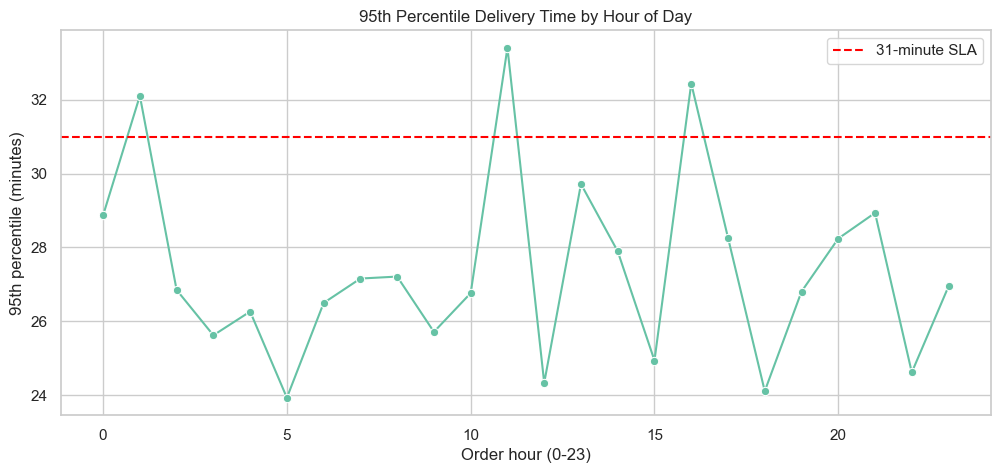

In [45]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=hour_stats.sort_values("order_hour"), x="order_hour", y="p95", marker="o")
plt.axhline(31, color="red", linestyle="--", label="31-minute SLA")
plt.title("95th Percentile Delivery Time by Hour of Day")
plt.xlabel("Order hour (0-23)")
plt.ylabel("95th percentile (minutes)")
plt.legend()
plt.show()

A few hours approach the SLA limit, but overall hourly performance remains within acceptable bounds.


## Orders volume by hour (to see peak load)


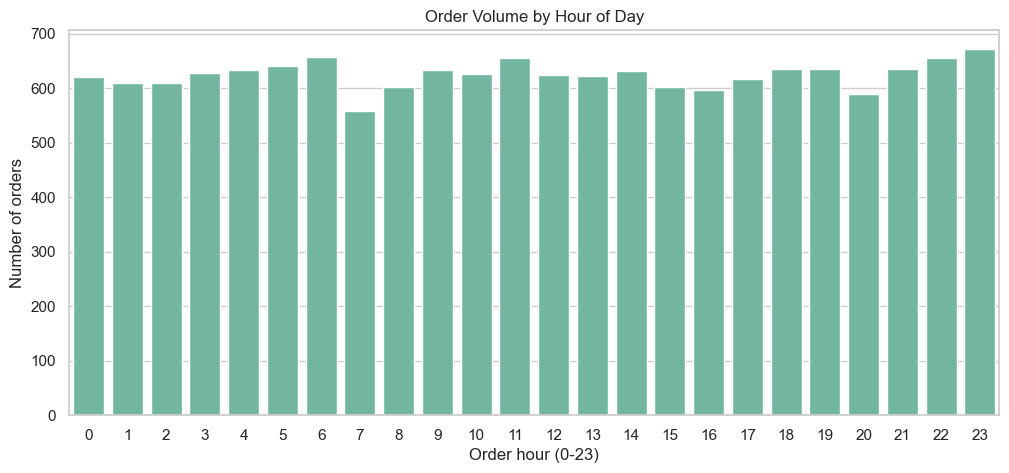

In [48]:
plt.figure(figsize=(12, 5))
sns.barplot(data=hour_stats.sort_values("order_hour"), x="order_hour", y="count")
plt.title("Order Volume by Hour of Day")
plt.xlabel("Order hour (0-23)")
plt.ylabel("Number of orders")
plt.show()

Order volume peaks during specific hours, indicating high customer demand periods.


## Late vs On-time Orders (Delivery > 31 min)

In [51]:
df["is_late"] = df["delivery_time_min"] > 31

late_rate_overall = df["is_late"].mean() * 100
print(f"Overall late order rate (>31 min): {late_rate_overall:.2f}%")

# Late rate by day of week
late_by_day = df.groupby("order_day")["is_late"].mean().reset_index()
late_by_day["late_rate_pct"] = late_by_day["is_late"] * 100

print("Late rate by day of week:")
late_by_day

Overall late order rate (>31 min): 3.71%
Late rate by day of week:


C:\Users\hp pc\AppData\Local\Temp\ipykernel_7032\2002851431.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  late_by_day = df.groupby("order_day")["is_late"].mean().reset_index()


,order_day,is_late,late_rate_pct
0,Monday,0.041667,4.166667
1,Tuesday,0.043616,4.361568
2,Wednesday,0.035414,3.541390
3,Thursday,0.036842,3.684211
4,Friday,0.032389,3.238866
5,Saturday,0.034857,3.485740
6,Sunday,0.036969,3.696942


Only a small proportion of orders are delivered late, showing strong on-time performance.


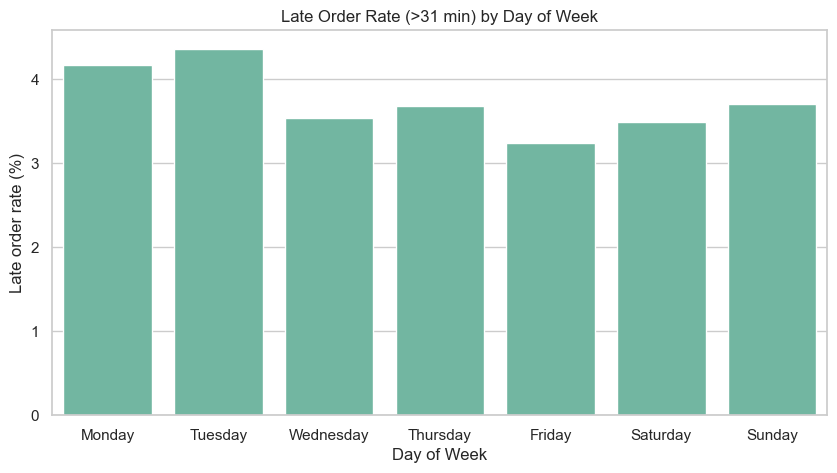

In [53]:
plt.figure(figsize=(10, 5))
sns.barplot(data=late_by_day, x="order_day", y="late_rate_pct")
plt.title("Late Order Rate (>31 min) by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Late order rate (%)")
plt.show()

Late delivery rates are consistently low across all days of the week.


### Hourly Delay Analysis

In [56]:
df['order_hour'] = df['order_placed_at'].dt.hour

In [58]:
hourly_avg = df.groupby('order_hour')['delivery_time_min'].mean()
hourly_avg

order_hour
0     24.116781
1     20.836201
2     19.123197
3     19.846034
4     18.818769
5     17.727910
6     18.501060
7     18.368406
8     19.264601
9     33.320277
10    21.014310
11    25.908233
12    19.731810
13    18.403554
14    18.999574
15    17.619334
16    18.711819
17    30.352864
18    17.758926
19    18.253996
20    19.247353
21    18.263140
22    18.963806
23    18.544586
Name: delivery_time_min, dtype: float64

Average delivery time increases during peak hours, reflecting higher operational load.


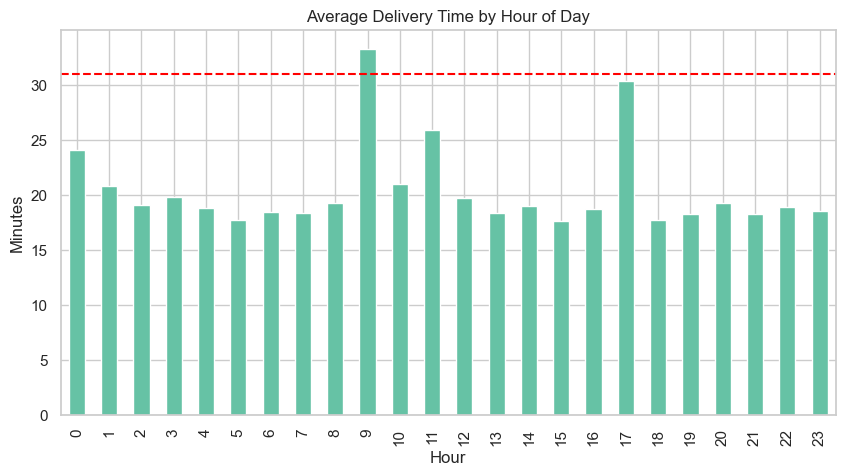

In [61]:
plt.figure(figsize=(10,5))
hourly_avg.plot(kind='bar')
plt.axhline(31, color='red', linestyle='--')
plt.title("Average Delivery Time by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Minutes")
plt.show()

Peak-hour congestion slightly raises delivery times, but averages remain within SLA limits.


## RESULTS

- Mean delivery time: ~20.5 minutes.
- Median delivery time: ~15.8 minutes.
- 95th percentile delivery time: ~27.3 minutes.
- Late delivery rate (>31 minutes): ~3.7% of total orders.
- Daily, weekly, and hourly 95th percentile values largely remain below the SLA threshold.


## CONCLUSION

The delivery performance analysis shows that the store consistently meets Dimino’s service-level agreement. 
The overall 95th percentile delivery time is well below the 31-minute limit, indicating reliable and efficient operations. 
Although a small number of extreme delays exist, they do not significantly impact overall SLA compliance. 
Performance remains stable across days and most hours, even during peak demand periods.


## RECOMMENDATIONS

1. Monitor extreme outlier deliveries to identify root causes.
2. Strengthen staffing and logistics during peak-hour demand.
3. Use real-time tracking to proactively manage delayed orders.
4. Maintain current operational practices that support SLA compliance.
